# Handwritten Sales Transaction Recognition

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


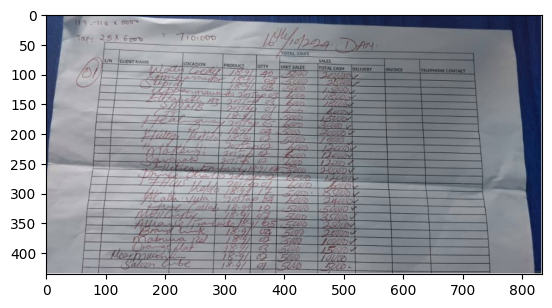

In [3]:
# Load image
image = cv2.imread('samples/jibu-handwritten-sales-1.jpg')

# display the image
plt.imshow(image)
plt.show()